#### The goal of this project file is to predict flow using ppt data

Version 4: 
- rename "predictors" to "variables"
- uses loop function to test different combinations of variables (previously named predictors) to achieve the best r2 values

In [1]:
import pandas as pd
import math
import numpy as np
import sklearn as sk
import sklearn.datasets as skd
import sklearn.ensemble as ske
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from pprint import pprint

%matplotlib inline

In [2]:
# importing flow dataset
df_flow = pd.read_excel('Daily ISCO flow and precipitation.xlsx', sheet_name = 'Sheet1')


df_flow = df_flow.drop(columns=['Daily precip (in)','Daily precip (mm)','S12-ISCO flow (cms)','T12-ISCO flow (cms)'])

df_flow = df_flow.rename(columns={'T8-ISCO flow (cms)':'Flow8', 'S11-ISCO flow (cms)':'Flow11', 'S12+T12':'Flow12'})

#df_flow = pd.DataFrame(df_flow, columns=['Sample date', 'Sample type', 'Site', 'Flow'])
df_flow.head()

,Date,Flow8,Flow11,Flow12
0,2015-01-01,NaN,NaN,NaN
1,2015-01-02,NaN,NaN,NaN
2,2015-01-03,NaN,NaN,NaN
3,2015-01-04,NaN,NaN,NaN
4,2015-01-05,NaN,NaN,NaN


In [3]:
# importing weather dataset
df_weather = pd.read_excel('Weather data.xlsx', sheet_name = 'Weather')
df_weather = df_weather.rename(columns={'ppt (mm)':'ppt','tmin (degrees C)':'tmin','tmean (degrees C)':'tmean',
                                        'tmax (degrees C)':'tmax', 'tdmean (degrees C)':'tdew', 'vpdmin (hPa)': 'vpdmin', 
                                        'vpdmax (hPa)': 'vpdmax'})

df_weather['Year'] = pd.DatetimeIndex(df_weather['Date']).year
df_weather['Month'] = pd.DatetimeIndex(df_weather['Date']).month
df_weather['Day'] = pd.DatetimeIndex(df_weather['Date']).day
df_weather['Day of year'] = df_weather['Date'].dt.dayofyear

# calculate antecedent ppt and temperature
# 2-day antecedent cumulative ppt (mm)
df_weather['2-day ppt'] = round(df_weather.iloc[:,1].rolling(window=2).sum(), 1)

# 3-day antecedent cumulative ppt (mm)
df_weather['3-day ppt'] = round(df_weather.iloc[:,1].rolling(window=3).sum(), 1)

# 5-day antecedent cumulative ppt (mm)
df_weather['5-day ppt'] = round(df_weather.iloc[:,1].rolling(window=5).sum(), 1)

# 7-day antecedent cumulative ppt (mm)
df_weather['7-day ppt'] = round(df_weather.iloc[:,1].rolling(window=7).sum(), 1)

# 15-day antecedent cumulative ppt (mm)
df_weather['15-day ppt'] = round(df_weather.iloc[:,1].rolling(window=15).sum(), 1)

# 30-day antecedent cumulative ppt (mm)
df_weather['30-day ppt'] = round(df_weather.iloc[:,1].rolling(window=30).sum(), 1)

# 90-day antecedent cumulative ppt (mm)
df_weather['90-day ppt'] = round(df_weather.iloc[:,1].rolling(window=90).sum(), 1)

# 180-day antecedent cumulative ppt (mm)
df_weather['180-day ppt'] = round(df_weather.iloc[:,1].rolling(window=180).sum(), 1)

# 360-day antecedent cumulative ppt (mm)
df_weather['360-day ppt'] = round(df_weather.iloc[:,1].rolling(window=360).sum(), 1)


# 2-day antecedent avg temperature (ºC)
df_weather['2-day temp'] = round(df_weather.iloc[:,3].rolling(window=2).mean(), 1)

# 3-day antecedent avg temperature (ºC)
df_weather['3-day temp'] = round(df_weather.iloc[:,3].rolling(window=3).mean(), 1)

# 5-day antecedent avg temperature (ºC)
df_weather['5-day temp'] = round(df_weather.iloc[:,3].rolling(window=5).mean(), 1)

# 7-day antecedent avg temperature (ºC)
df_weather['7-day temp'] = round(df_weather.iloc[:,3].rolling(window=7).mean(), 1)

# 15-day antecedent avg temperature (ºC)
df_weather['15-day temp'] = round(df_weather.iloc[:,3].rolling(window=15).mean(), 1)

# 30-day antecedent avg temperature (ºC)
df_weather['30-day temp'] = round(df_weather.iloc[:,3].rolling(window=30).mean(), 1)

df_weather = df_weather.drop(columns=['tmin','tmax','tdew','vpdmin','vpdmax'])
df_train = df_weather[df_weather["Year"].isin([2015, 2016, 2017])]

#df_weather.head()

# merging flow and weather datasets
df_merged = pd.merge(df_train, df_flow, left_on='Date', right_on='Date', how='right')
df_merged = df_merged.dropna()

writer = pd.ExcelWriter('weather_test.xlsx')
# write dataframe to excel
df_merged.to_excel(writer)
# save the excel
writer.save()

#df_merged.tail()
#df_merged.describe()

### Random forest

which subwatershed to analyze?
8
subwatershed  8  is selected


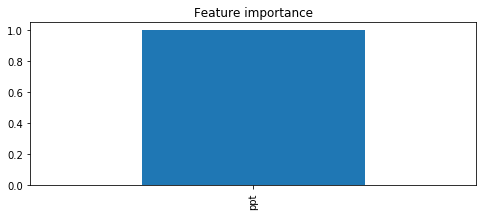

C:\Users\jiyeow\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


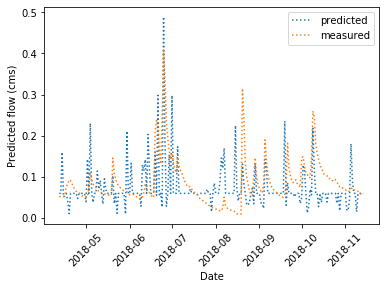

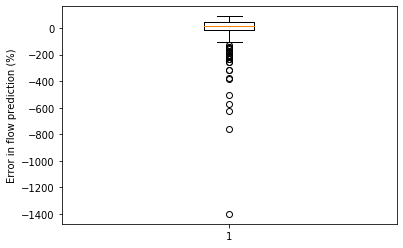

R2 value:  -0.14
Variables included: ['ppt']
Average error: -25.73
Median error: 14.0
[0]
[1.]


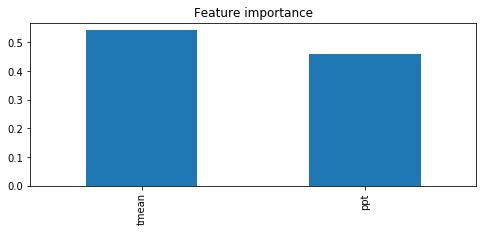

C:\Users\jiyeow\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


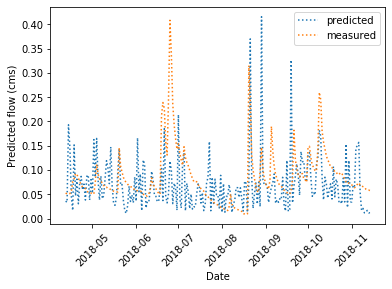

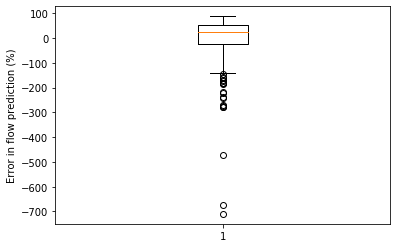

R2 value:  -0.43
Variables included: ['ppt', 'tmean']
Average error: -8.56
Median error: 25.0
[1 0]
[0.54139087 0.45860913]


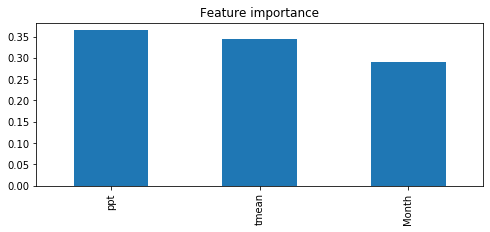

C:\Users\jiyeow\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


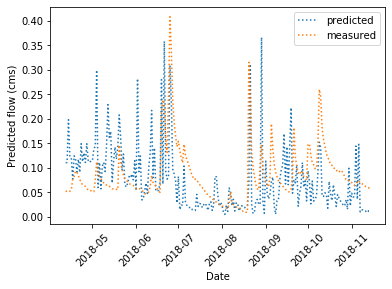

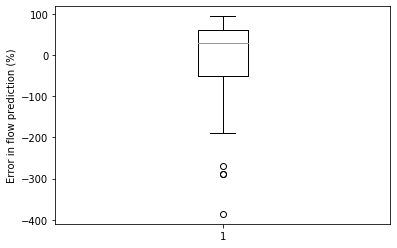

R2 value:  -0.52
Variables included: ['ppt', 'tmean', 'Month']
Average error: -5.51
Median error: 30.0
[0 1 2]
[0.36461129 0.34400005 0.29138866]
least important feature removed: Month


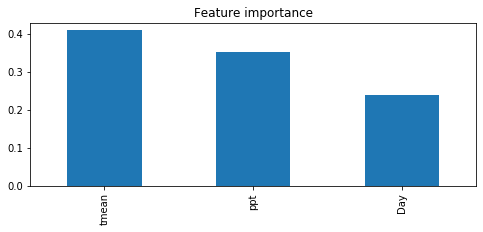

C:\Users\jiyeow\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


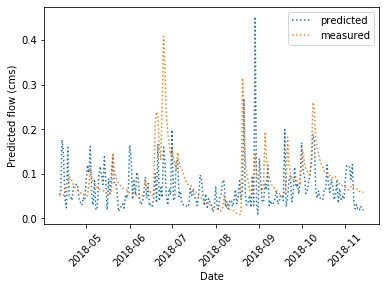

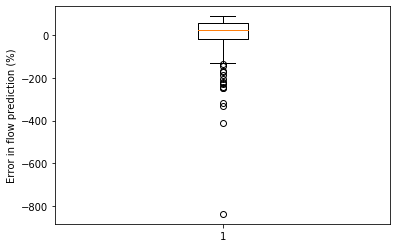

R2 value:  -0.25
Variables included: ['ppt', 'tmean', 'Day']
Average error: -3.55
Median error: 25.0
[1 0 2]
[0.40831883 0.35242276 0.23925841]


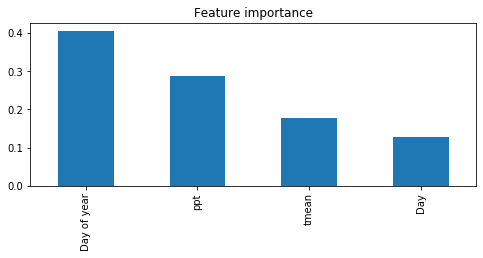

C:\Users\jiyeow\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


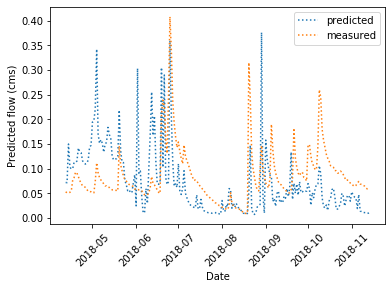

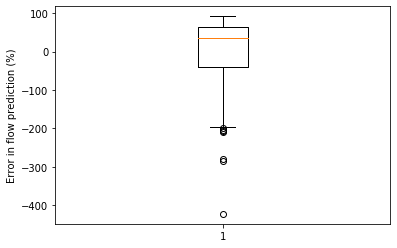

R2 value:  -0.62
Variables included: ['ppt', 'tmean', 'Day', 'Day of year']
Average error: 1.38
Median error: 35.0
[3 0 1 2]
[0.40601582 0.28721244 0.17798114 0.12879059]
least important feature removed: Day


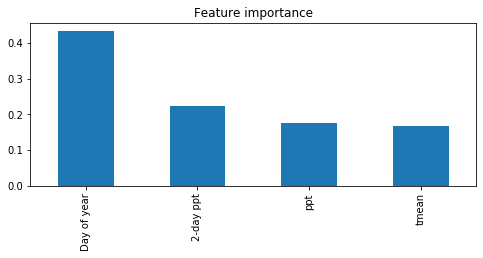

C:\Users\jiyeow\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


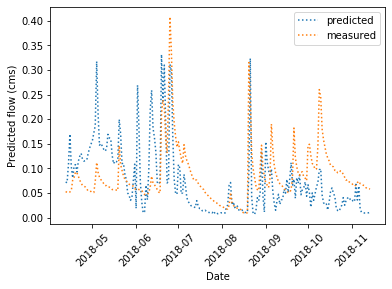

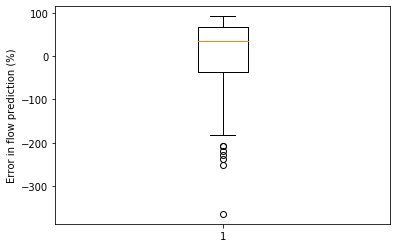

R2 value:  -0.41
Variables included: ['ppt', 'tmean', 'Day of year', '2-day ppt']
Average error: 1.55
Median error: 35.0
[2 3 0 1]
[0.43377227 0.22346526 0.17594211 0.16682036]


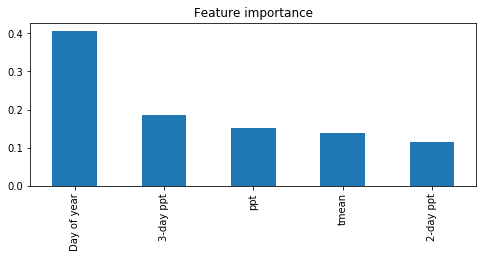

C:\Users\jiyeow\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


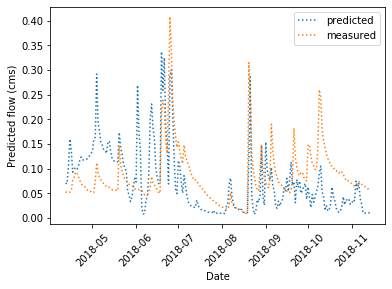

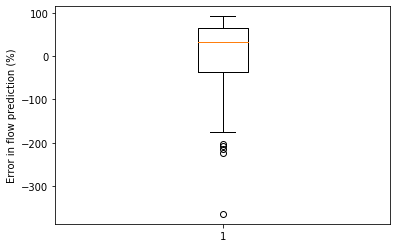

R2 value:  -0.3
Variables included: ['ppt', 'tmean', 'Day of year', '2-day ppt', '3-day ppt']
Average error: 2.06
Median error: 32.0
[2 4 0 1 3]
[0.40674883 0.1860601  0.15219828 0.1388268  0.11616599]


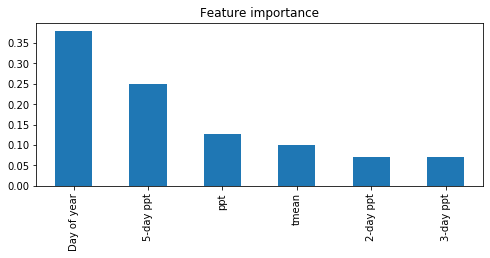

C:\Users\jiyeow\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


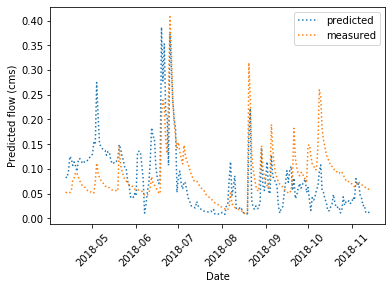

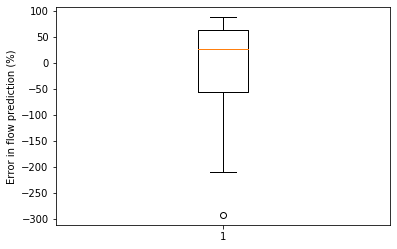

R2 value:  -0.06
Variables included: ['ppt', 'tmean', 'Day of year', '2-day ppt', '3-day ppt', '5-day ppt']
Average error: -0.36
Median error: 26.0
[2 5 0 1 3 4]
[0.3798502  0.24942855 0.1279409  0.09960251 0.07186249 0.07131535]


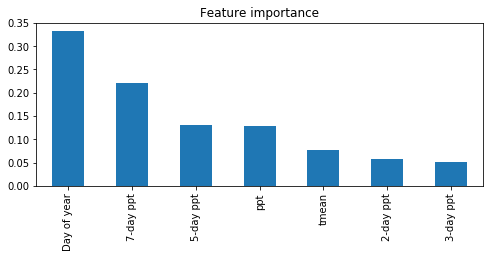

C:\Users\jiyeow\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


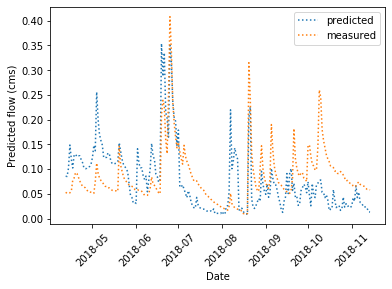

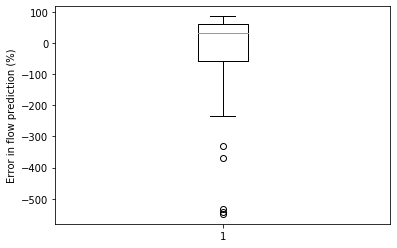

R2 value:  -0.05
Variables included: ['ppt', 'tmean', 'Day of year', '2-day ppt', '3-day ppt', '5-day ppt', '7-day ppt']
Average error: -7.54
Median error: 31.0
[2 6 5 0 1 3 4]
[0.33343257 0.22094807 0.12990901 0.12967978 0.07714607 0.05732046
 0.05156405]


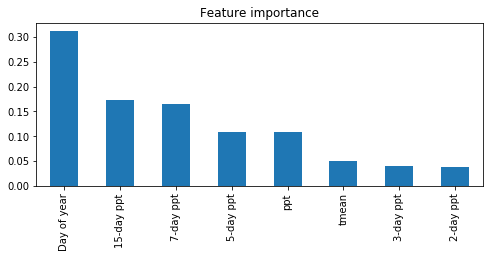

C:\Users\jiyeow\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


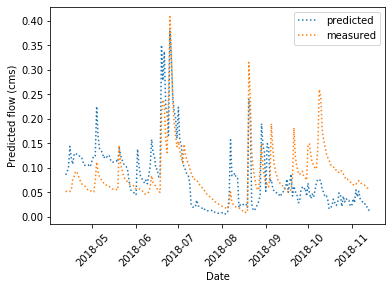

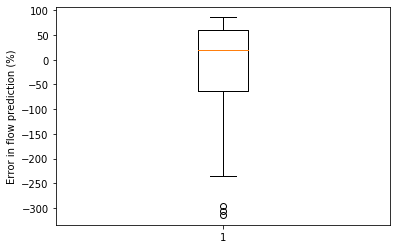

R2 value:  0.08
Variables included: ['ppt', 'tmean', 'Day of year', '2-day ppt', '3-day ppt', '5-day ppt', '7-day ppt', '15-day ppt']
Average error: -7.22
Median error: 19.0
[2 7 6 5 0 1 4 3]
[0.31300126 0.173331   0.16608948 0.10964007 0.10902199 0.05115823
 0.03985437 0.0379036 ]


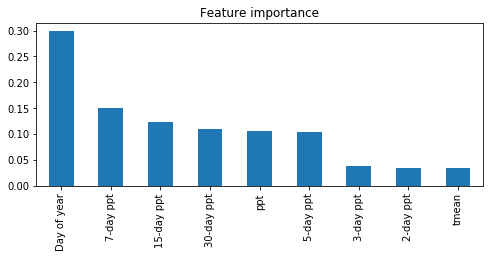

C:\Users\jiyeow\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


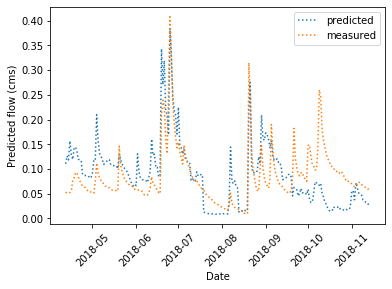

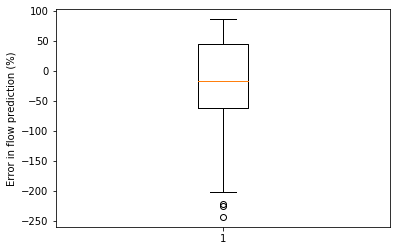

R2 value:  0.13
Variables included: ['ppt', 'tmean', 'Day of year', '2-day ppt', '3-day ppt', '5-day ppt', '7-day ppt', '15-day ppt', '30-day ppt']
Average error: -15.76
Median error: -16.0
[2 6 7 8 0 5 4 3 1]
[0.29992869 0.15143352 0.12320334 0.10975564 0.10533822 0.10345085
 0.03752209 0.03520209 0.03416555]


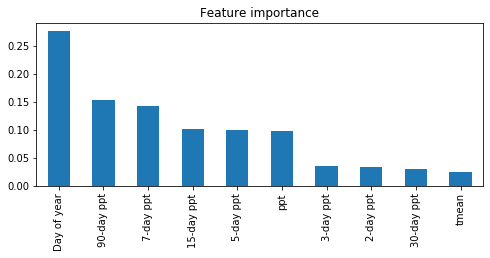

C:\Users\jiyeow\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


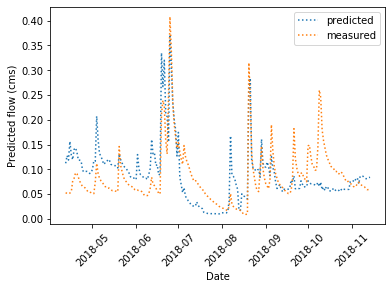

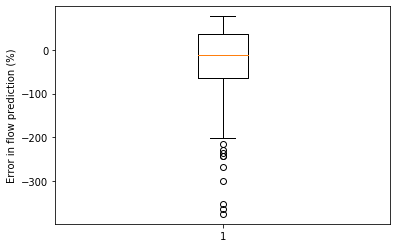

R2 value:  0.29
Variables included: ['ppt', 'tmean', 'Day of year', '2-day ppt', '3-day ppt', '5-day ppt', '7-day ppt', '15-day ppt', '30-day ppt', '90-day ppt']
Average error: -23.43
Median error: -12.0
[2 9 6 7 5 0 4 3 8 1]
[0.27769266 0.15385364 0.14260422 0.10163702 0.10036793 0.09905047
 0.03585114 0.03394589 0.03083575 0.02416128]


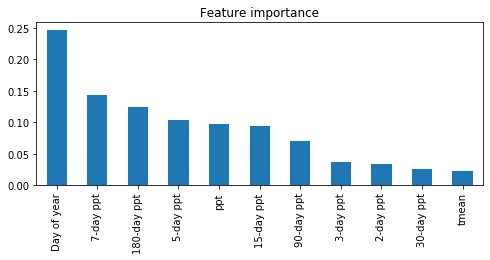

C:\Users\jiyeow\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


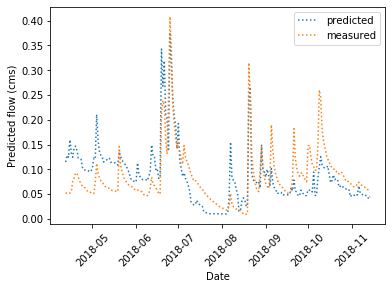

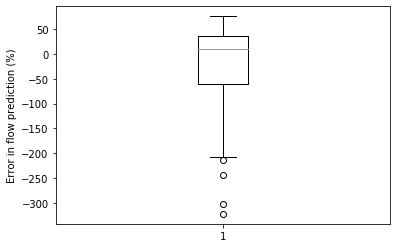

R2 value:  0.39
Variables included: ['ppt', 'tmean', 'Day of year', '2-day ppt', '3-day ppt', '5-day ppt', '7-day ppt', '15-day ppt', '30-day ppt', '90-day ppt', '180-day ppt']
Average error: -15.59
Median error: 10.0
[ 2  6 10  5  0  7  9  4  3  8  1]
[0.24644414 0.14376874 0.12443516 0.10323844 0.09806587 0.09378524
 0.06987162 0.03775526 0.03429575 0.02558769 0.02275209]


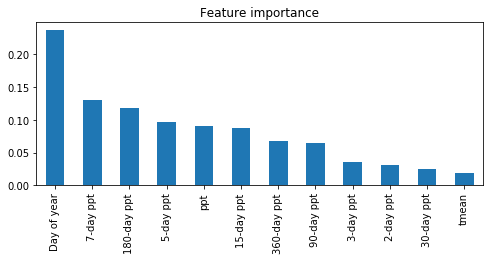

C:\Users\jiyeow\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


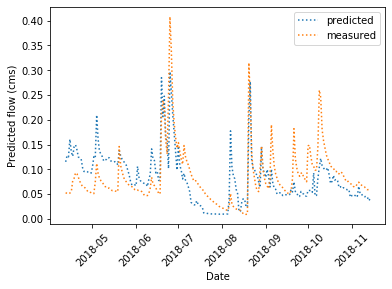

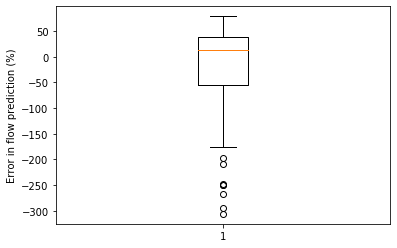

R2 value:  0.36
Variables included: ['ppt', 'tmean', 'Day of year', '2-day ppt', '3-day ppt', '5-day ppt', '7-day ppt', '15-day ppt', '30-day ppt', '90-day ppt', '180-day ppt', '360-day ppt']
Average error: -13.11
Median error: 14.0
[ 2  6 10  5  0  7 11  9  4  3  8  1]
[0.23648266 0.13078982 0.11764765 0.09696506 0.08988149 0.08682528
 0.06736306 0.06458519 0.03568582 0.03074509 0.02447025 0.01855863]
least important feature removed: tmean


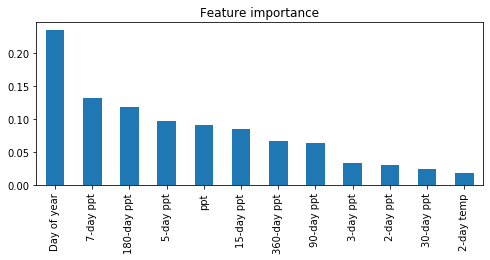

C:\Users\jiyeow\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


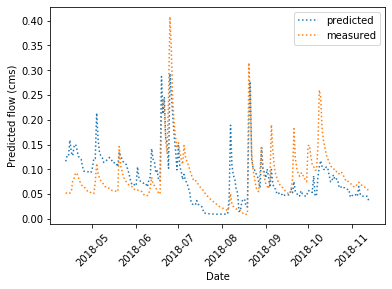

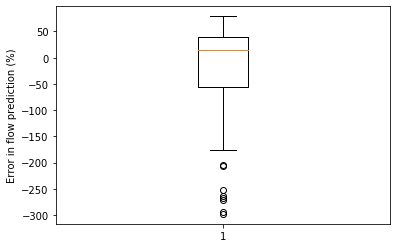

R2 value:  0.35
Variables included: ['ppt', 'Day of year', '2-day ppt', '3-day ppt', '5-day ppt', '7-day ppt', '15-day ppt', '30-day ppt', '90-day ppt', '180-day ppt', '360-day ppt', '2-day temp']
Average error: -13.05
Median error: 14.0
[ 1  5  9  4  0  6 10  8  3  2  7 11]
[0.23467451 0.13166048 0.11862019 0.09781391 0.09076176 0.08543329
 0.06739782 0.06430935 0.0346284  0.0315226  0.02437696 0.01880072]
least important feature removed: 2-day temp


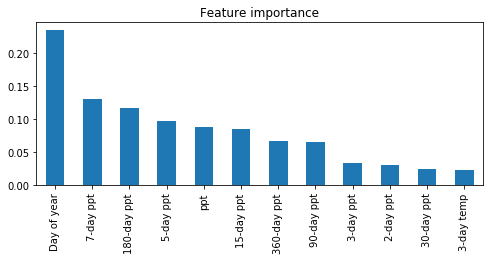

C:\Users\jiyeow\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


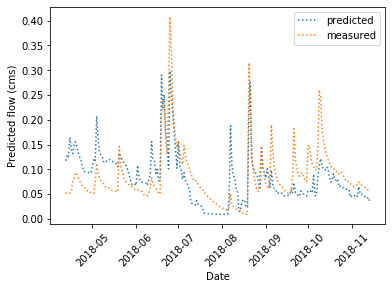

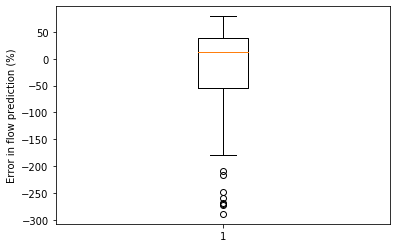

R2 value:  0.35
Variables included: ['ppt', 'Day of year', '2-day ppt', '3-day ppt', '5-day ppt', '7-day ppt', '15-day ppt', '30-day ppt', '90-day ppt', '180-day ppt', '360-day ppt', '3-day temp']
Average error: -13.21
Median error: 12.0
[ 1  5  9  4  0  6 10  8  3  2  7 11]
[0.23493866 0.1308955  0.11786125 0.09705009 0.08828727 0.08569674
 0.0679117  0.06495149 0.03373845 0.03058599 0.02450364 0.02357922]


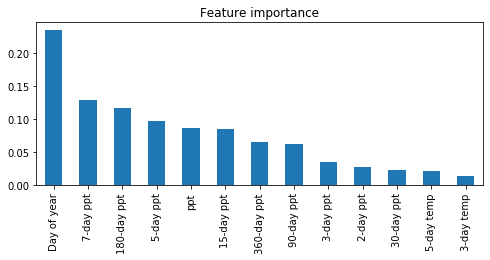

C:\Users\jiyeow\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


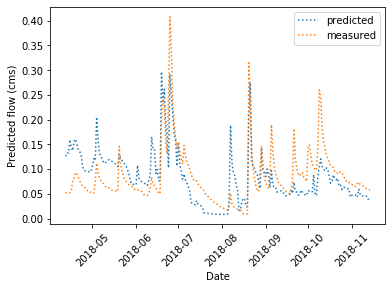

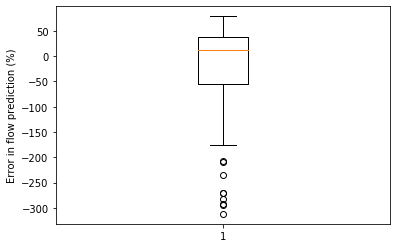

R2 value:  0.32
Variables included: ['ppt', 'Day of year', '2-day ppt', '3-day ppt', '5-day ppt', '7-day ppt', '15-day ppt', '30-day ppt', '90-day ppt', '180-day ppt', '360-day ppt', '3-day temp', '5-day temp']
Average error: -14.98
Median error: 13.0
[ 1  5  9  4  0  6 10  8  3  2  7 12 11]
[0.23425373 0.12951953 0.11692824 0.09676649 0.08588302 0.08556765
 0.06624338 0.06300312 0.03499556 0.02792522 0.02338381 0.02170612
 0.01382413]
least important feature removed: 3-day temp


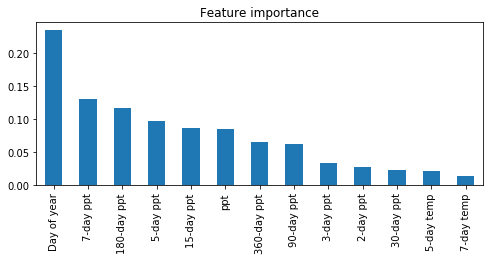

C:\Users\jiyeow\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


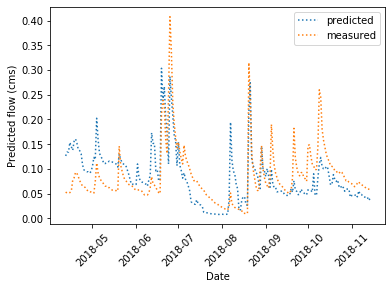

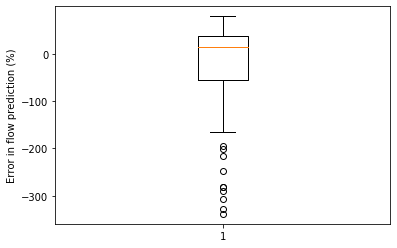

R2 value:  0.31
Variables included: ['ppt', 'Day of year', '2-day ppt', '3-day ppt', '5-day ppt', '7-day ppt', '15-day ppt', '30-day ppt', '90-day ppt', '180-day ppt', '360-day ppt', '5-day temp', '7-day temp']
Average error: -15.34
Median error: 15.0
[ 1  5  9  4  6  0 10  8  3  2  7 11 12]
[0.23399064 0.13051281 0.11719387 0.0970998  0.08642065 0.08498359
 0.06592648 0.06287077 0.03419112 0.02822689 0.02306998 0.02151159
 0.0140018 ]
least important feature removed: 7-day temp


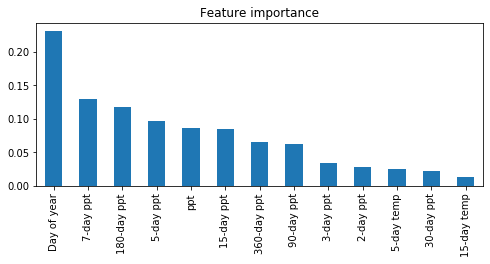

C:\Users\jiyeow\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


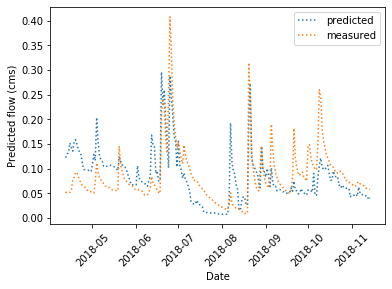

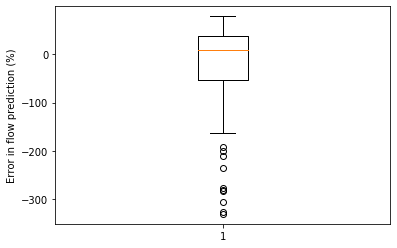

R2 value:  0.34
Variables included: ['ppt', 'Day of year', '2-day ppt', '3-day ppt', '5-day ppt', '7-day ppt', '15-day ppt', '30-day ppt', '90-day ppt', '180-day ppt', '360-day ppt', '5-day temp', '15-day temp']
Average error: -14.44
Median error: 10.0
[ 1  5  9  4  0  6 10  8  3  2 11  7 12]
[0.2314479  0.12986111 0.11725613 0.096855   0.08628103 0.08515819
 0.06628884 0.06285672 0.03386554 0.02826804 0.02599554 0.02239165
 0.01347431]


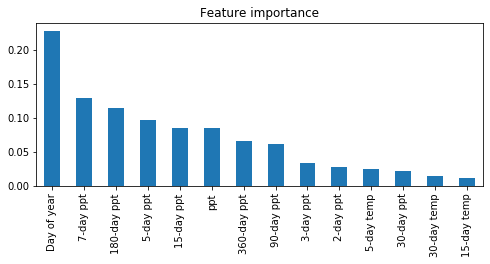

C:\Users\jiyeow\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


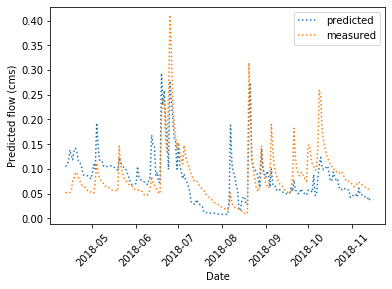

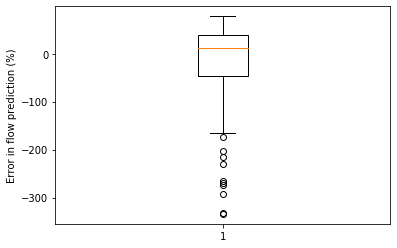

R2 value:  0.4
Variables included: ['ppt', 'Day of year', '2-day ppt', '3-day ppt', '5-day ppt', '7-day ppt', '15-day ppt', '30-day ppt', '90-day ppt', '180-day ppt', '360-day ppt', '5-day temp', '15-day temp', '30-day temp']
Average error: -11.22
Median error: 12.0
[ 1  5  9  4  6  0 10  8  3  2 11  7 13 12]
[0.22769297 0.12912208 0.11513862 0.09616225 0.08472749 0.08444139
 0.06544938 0.06098077 0.03322376 0.02838035 0.02563803 0.02178072
 0.01529819 0.01196401]
END OF FIRST LOOP
14


In [60]:
from sklearn.metrics import explained_variance_score, mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# prompt user input to identify which subwatershed to work on
print ('which subwatershed to analyze?')
sub = input()
print ('subwatershed ', sub, ' is selected')

sub_flow = 'Flow' + sub
y = df_merged[sub_flow]

# convert Sample date from timestamp to numeric because sklearn cannot process timestamp format
df_merged['Date'] = pd.to_numeric(pd.to_datetime(df_merged['Date']))

# look up all the variables, and remove uncessary variables
all_variables = list(df_merged.columns)
unwanted = {'Date', 'Year', 'Flow8', 'Flow11', 'Flow12'}
all_variables = [e for e in all_variables if e not in unwanted]

# create an empty list
variables = []
r2_prev = 0
r2 = 0
list_no = 0


while r2 < 0.7 and list_no < len(all_variables):
    
    variables.append(all_variables[list_no])
    
    X = df_merged[variables]
    X_train, X_test, Y_train, Y_test = train_test_split (X, y, test_size = 0.2, random_state = 0)

    rf_base = ske.RandomForestRegressor(n_estimators = 1000, random_state = 0)

    rf_base.fit(X_train, Y_train)

    Y_pred = rf_base.predict(X_test)

    #print('training period explained variance:', explained_variance_score(Y_test, Y_pred))
    #print('training period mean abs error:',mean_absolute_error(Y_test, Y_pred))
    #print('training period mean squared error:',mean_squared_error(Y_test, Y_pred))
    #print('training period r2:',r2_score(Y_test, Y_pred))
        
    fet_ind = np.argsort(rf_base.feature_importances_)[::-1]
    fet_imp = rf_base.feature_importances_[np.argsort(rf_base.feature_importances_)][::-1]
    
    fig, ax = plt.subplots(1, 1, figsize=(8,3))
    labels = np.asarray(X_train.columns[fet_ind])
    pd.Series(fet_imp, index = labels).plot('bar', ax=ax)
    ax.set_title('Feature importance')
    plt.show()

    df_weathersub = df_weather[df_weather["Year"].isin([2018])]
    df_weathersub = df_weathersub.reset_index(drop=True)
    df_test = df_weathersub
    df_test = df_test[variables]
    df_test = df_test.dropna()
    df_test = df_test.reset_index(drop=True)

    # If 'Date' variable is present, convert the date from timestamp to numeric because sklearn cannot process timestamp format
    if 'Date' in list(df_test):
        df_test['Date'] = pd.to_numeric(pd.to_datetime(df_test['Date']))

    # use base or random depending on model performance
    #Y_pred = rf_base.predict(df_test)
    Y_pred = rf_base.predict(df_test)

    df_predict = pd.DataFrame(Y_pred, columns=['flow_pred'])
    df_predict = pd.merge(df_test, df_predict, left_index=True, right_index=True)
    df_predict = pd.merge(df_weathersub['Date'], df_predict, left_index=True, right_index=True)
    df_predict = df_predict.rename(columns={'Date_x':'Date', 'Date_y':'Date num'})

    #df_predict['Date'] = pd.to_datetime(df_predict['Date'])

    # this is ISCO daily avg flow
    df_actual = df_flow[['Date', sub_flow]]
    df_actual['Year'] = pd.DatetimeIndex(df_actual['Date']).year
    df_actual = df_actual[df_actual["Year"].isin([2018])]
    df_actual = df_actual.dropna()

    df_predict = pd.merge(df_predict, df_actual, left_on='Date', right_on='Date', how='right')
    df_predict['error (%)'] = round(((df_predict[sub_flow]-df_predict['flow_pred'])/df_predict[sub_flow]*100), 0)

    plt.plot(df_predict['Date'], df_predict['flow_pred'], linestyle = 'dotted', label='predicted')
    plt.xlabel('Date')
    plt.xticks(rotation = 45)
    plt.plot(df_predict['Date'], df_predict[sub_flow], linestyle = 'dotted', label='measured')
    plt.ylabel('Predicted flow (cms)')
    plt.legend()
    plt.show()

    #print('prediction period explained variance:',explained_variance_score(df_predict[sub_flow], df_predict['flow_pred']))
    #print('prediction period mean abs error:',mean_absolute_error(df_predict[sub_flow], df_predict['flow_pred']))
    #print('prediction period mean squared error:',mean_squared_error(df_predict[sub_flow], df_predict['flow_pred']))
    #print('prediction period r2:',r2_score(df_predict[sub_flow], df_predict['flow_pred']))


    plt.boxplot(df_predict['error (%)'])
    plt.ylabel('Error in flow prediction (%)')
    plt.show()

    r2 = r2_score(df_predict[sub_flow], df_predict['flow_pred'])
     
    print('R2 value: ', round(r2, 2))
    print('Variables included:', variables)
    print('Average error:', round(df_predict['error (%)'].mean(),2))
    print('Median error:', round(df_predict['error (%)'].median(),2))
    
    # remove the variable with least feature importance if model r2 decreases (after having at least 3 parameters)
    print(fet_ind)
    print(fet_imp)
    if r2 < r2_prev and list_no + 1 > 2:
        least_important = fet_ind[-1]
        print('least important feature removed:', variables[least_important])
        variables.remove(variables[least_important]) 
    
    list_no = list_no + 1
    r2_prev = r2

print('END OF FIRST LOOP')    
    
# remove features with importance < 0.05
variable_no = len(variables) 
print(variable_no)
count = 0

#while variable_no > count:
    
    #least_important = fet_ind[-1]
    #print(least_important)
    #print(variables[least_important])
    #if fet_imp[least_important] < 0.05:
        #print('least important feature removed 2:', variables[least_important])
        #variables.remove(variables[least_important])
        
    #variable_no = len(variables)
    #count = count + 1
    
writer = pd.ExcelWriter('predict flow 2018 daily.xlsx')
# write dataframe to excel
df_predict.to_excel(writer)
# save the excel
writer.save()


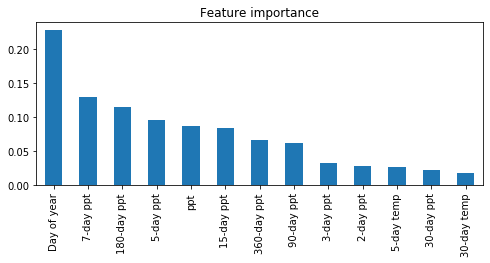

C:\Users\jiyeow\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


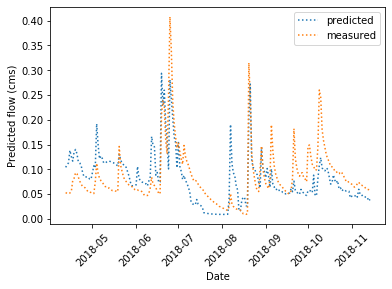

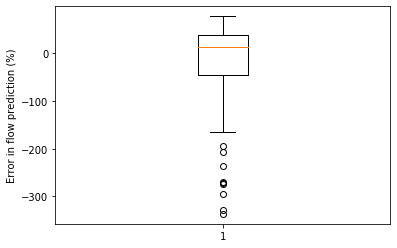

R2 value:  0.38
Variables included: ['ppt', 'Day of year', '2-day ppt', '3-day ppt', '5-day ppt', '7-day ppt', '15-day ppt', '30-day ppt', '90-day ppt', '180-day ppt', '360-day ppt', '5-day temp', '30-day temp']
Average error: -11.94
Median error: 14.0


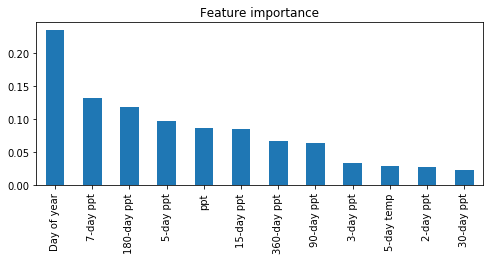

C:\Users\jiyeow\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


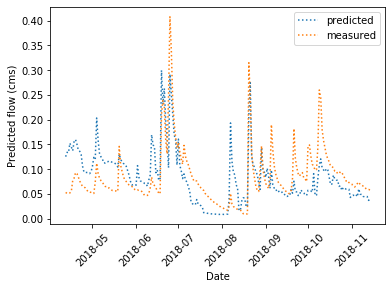

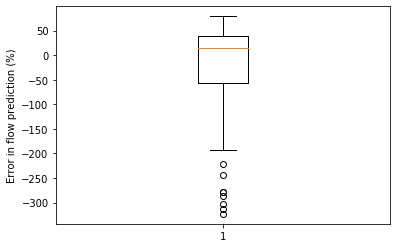

R2 value:  0.32
Variables included: ['ppt', 'Day of year', '2-day ppt', '3-day ppt', '5-day ppt', '7-day ppt', '15-day ppt', '30-day ppt', '90-day ppt', '180-day ppt', '360-day ppt', '5-day temp']
Average error: -15.2
Median error: 14.0
Important feature added: 30-day ppt


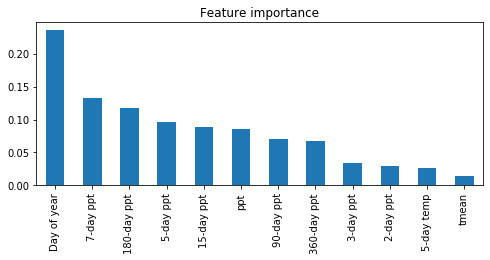

C:\Users\jiyeow\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


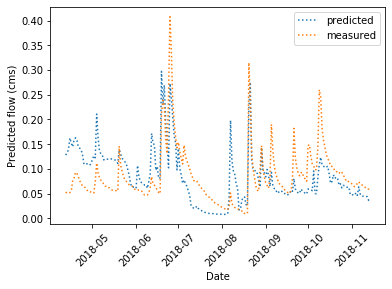

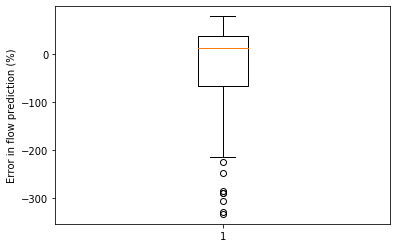

R2 value:  0.25
Variables included: ['ppt', 'Day of year', '2-day ppt', '3-day ppt', '5-day ppt', '7-day ppt', '15-day ppt', '90-day ppt', '180-day ppt', '360-day ppt', '5-day temp', 'tmean']
Average error: -17.35
Median error: 12.0
Important feature added: tmean


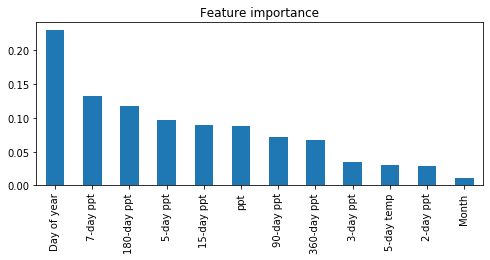

C:\Users\jiyeow\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


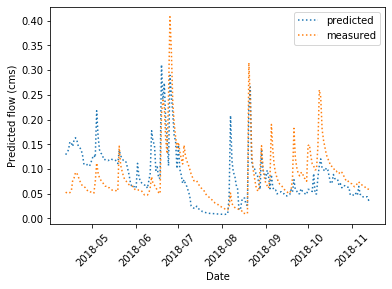

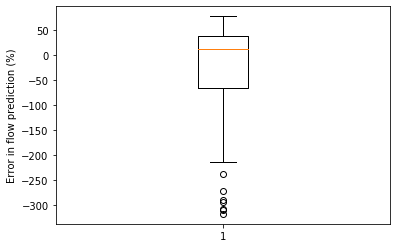

R2 value:  0.23
Variables included: ['ppt', 'Day of year', '2-day ppt', '3-day ppt', '5-day ppt', '7-day ppt', '15-day ppt', '90-day ppt', '180-day ppt', '360-day ppt', '5-day temp', 'Month']
Average error: -16.74
Median error: 13.0
Important feature added: Month


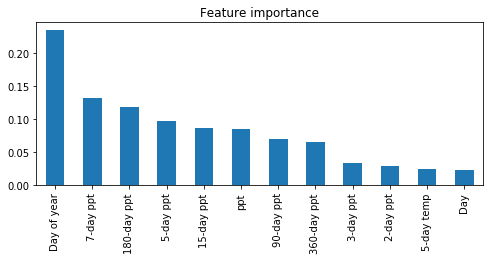

C:\Users\jiyeow\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


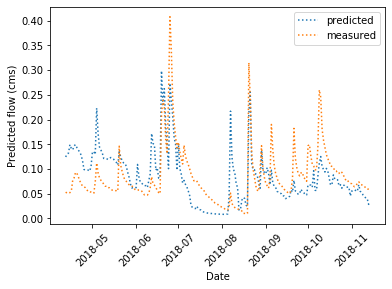

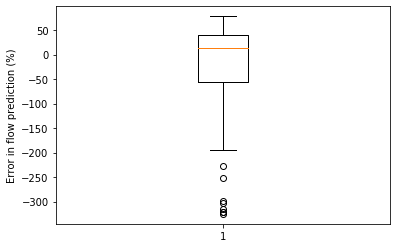

R2 value:  0.26
Variables included: ['ppt', 'Day of year', '2-day ppt', '3-day ppt', '5-day ppt', '7-day ppt', '15-day ppt', '90-day ppt', '180-day ppt', '360-day ppt', '5-day temp', 'Day']
Average error: -16.08
Median error: 14.0


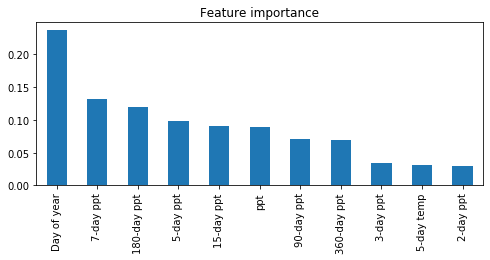

C:\Users\jiyeow\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


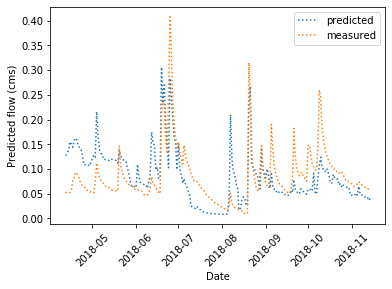

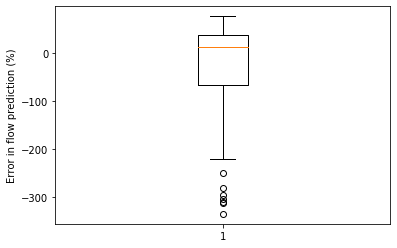

R2 value:  0.24
Variables included: ['ppt', 'Day of year', '2-day ppt', '3-day ppt', '5-day ppt', '7-day ppt', '15-day ppt', '90-day ppt', '180-day ppt', '360-day ppt', '5-day temp']
Average error: -17.1
Median error: 14.0
Important feature added: 2-day ppt


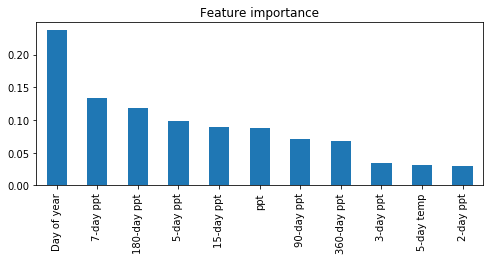

C:\Users\jiyeow\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


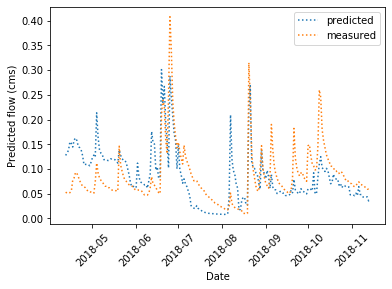

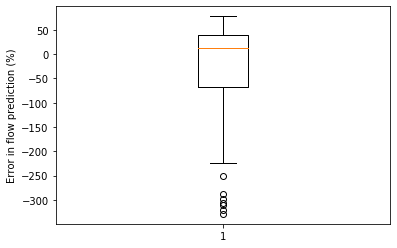

R2 value:  0.24
Variables included: ['ppt', 'Day of year', '3-day ppt', '5-day ppt', '7-day ppt', '15-day ppt', '90-day ppt', '180-day ppt', '360-day ppt', '5-day temp', '2-day ppt']
Average error: -17.33
Median error: 13.0


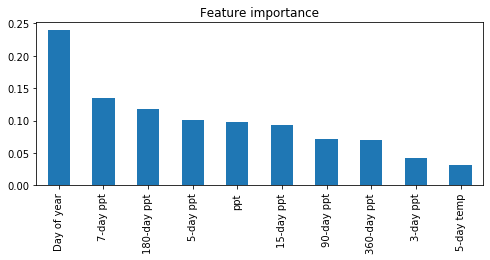

C:\Users\jiyeow\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


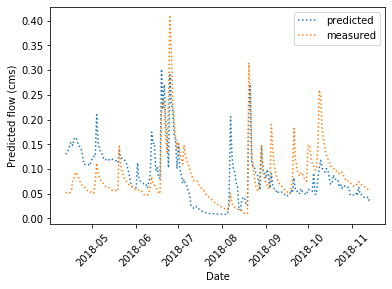

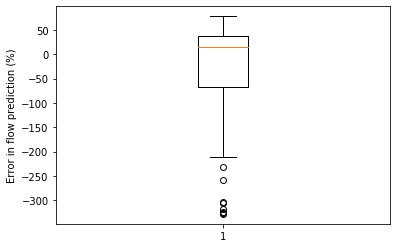

R2 value:  0.23
Variables included: ['ppt', 'Day of year', '3-day ppt', '5-day ppt', '7-day ppt', '15-day ppt', '90-day ppt', '180-day ppt', '360-day ppt', '5-day temp']
Average error: -17.7
Median error: 14.0
Important feature added: 5-day temp


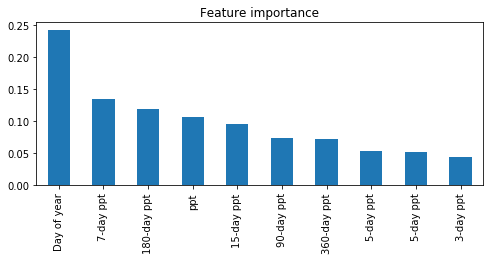

C:\Users\jiyeow\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


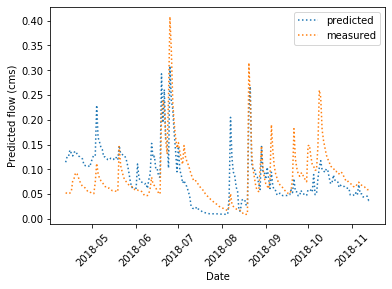

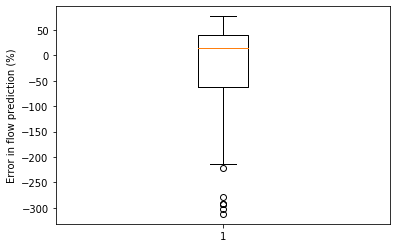

R2 value:  0.27
Variables included: ['ppt', 'Day of year', '3-day ppt', '5-day ppt', '7-day ppt', '15-day ppt', '90-day ppt', '180-day ppt', '360-day ppt', '5-day ppt']
Average error: -15.67
Median error: 15.0


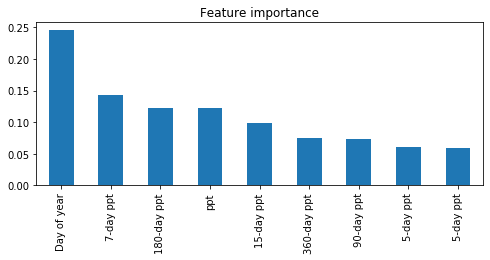

C:\Users\jiyeow\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


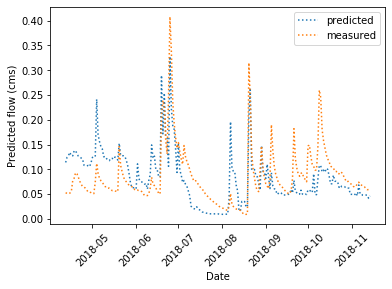

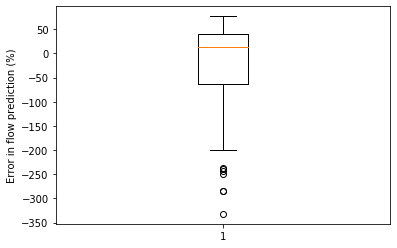

R2 value:  0.27
Variables included: ['ppt', 'Day of year', '5-day ppt', '7-day ppt', '15-day ppt', '90-day ppt', '180-day ppt', '360-day ppt', '5-day ppt']
Average error: -14.8
Median error: 14.0
Important feature added: 5-day ppt


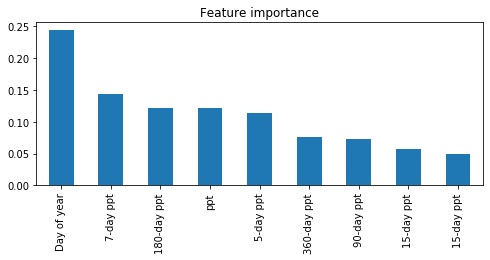

C:\Users\jiyeow\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


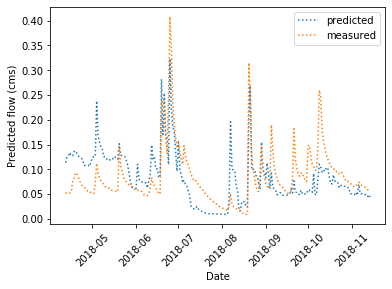

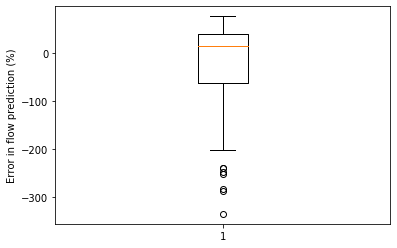

R2 value:  0.27
Variables included: ['ppt', 'Day of year', '7-day ppt', '15-day ppt', '90-day ppt', '180-day ppt', '360-day ppt', '5-day ppt', '15-day ppt']
Average error: -15.17
Median error: 14.0


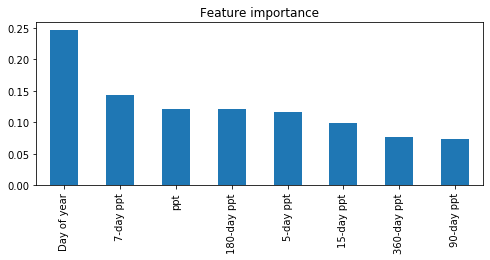

C:\Users\jiyeow\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


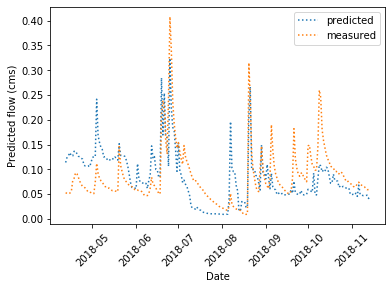

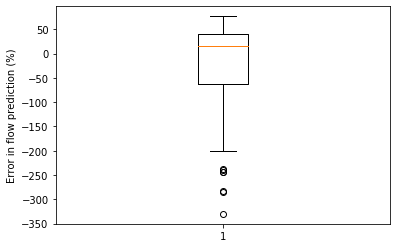

R2 value:  0.27
Variables included: ['ppt', 'Day of year', '7-day ppt', '90-day ppt', '180-day ppt', '360-day ppt', '5-day ppt', '15-day ppt']
Average error: -14.5
Median error: 15.0


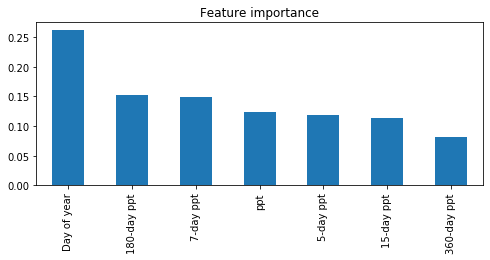

C:\Users\jiyeow\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


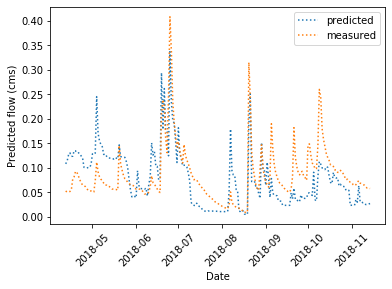

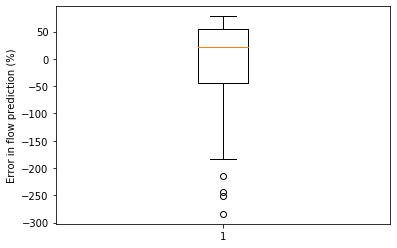

R2 value:  0.24
Variables included: ['ppt', 'Day of year', '7-day ppt', '180-day ppt', '360-day ppt', '5-day ppt', '15-day ppt']
Average error: -1.62
Median error: 22.0
Important feature added: 360-day ppt


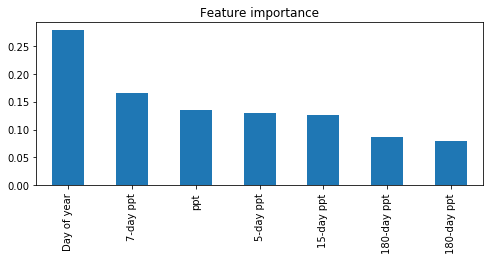

C:\Users\jiyeow\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


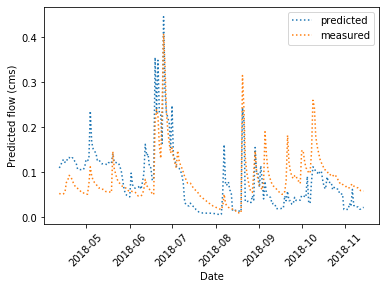

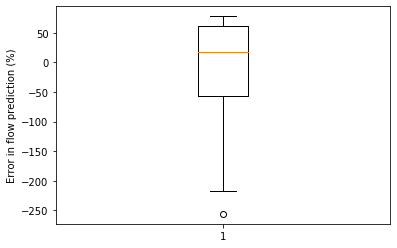

R2 value:  0.19
Variables included: ['ppt', 'Day of year', '7-day ppt', '180-day ppt', '5-day ppt', '15-day ppt', '180-day ppt']
Average error: -2.89
Median error: 18.0
Important feature added: 180-day ppt


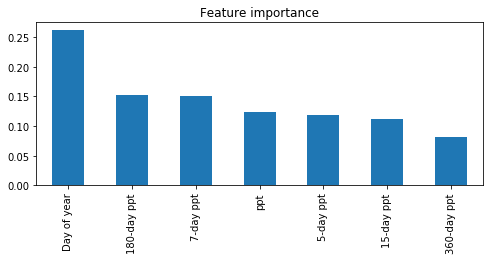

C:\Users\jiyeow\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


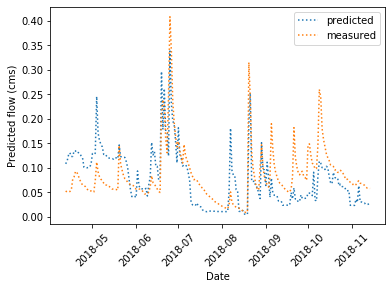

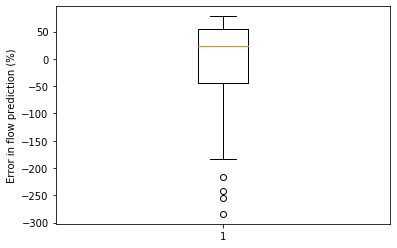

R2 value:  0.24
Variables included: ['ppt', 'Day of year', '7-day ppt', '5-day ppt', '15-day ppt', '180-day ppt', '360-day ppt']
Average error: -1.59
Median error: 23.0


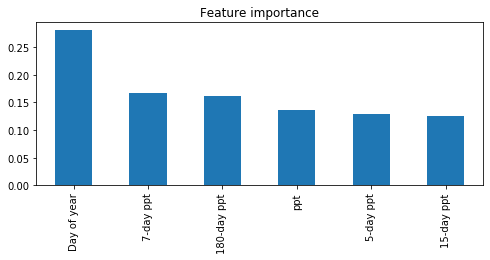

C:\Users\jiyeow\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


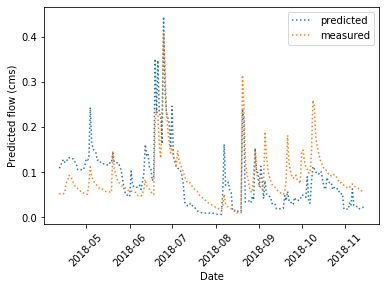

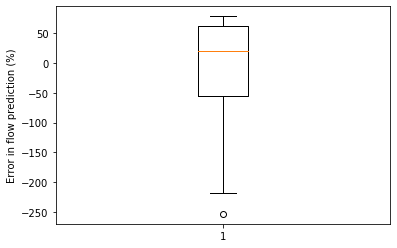

R2 value:  0.19
Variables included: ['ppt', 'Day of year', '7-day ppt', '5-day ppt', '15-day ppt', '180-day ppt']
Average error: -2.85
Median error: 19.0
Important feature added: 15-day ppt


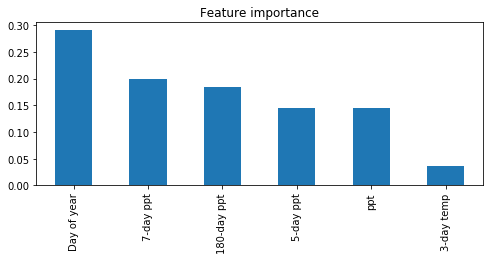

C:\Users\jiyeow\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


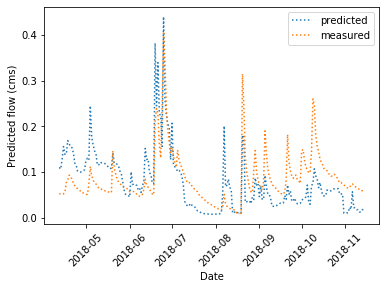

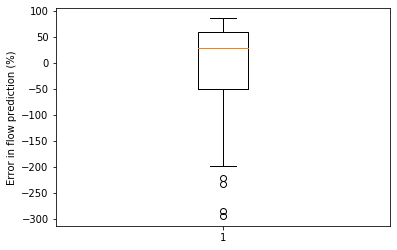

R2 value:  0.08
Variables included: ['ppt', 'Day of year', '7-day ppt', '5-day ppt', '180-day ppt', '3-day temp']
Average error: 0.76
Median error: 29.0
Important feature added: 3-day temp


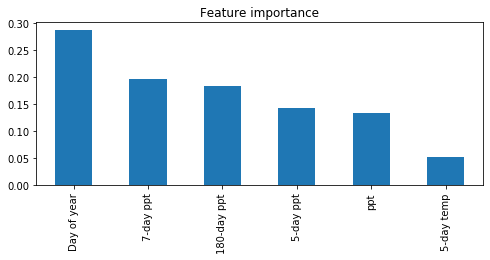

C:\Users\jiyeow\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


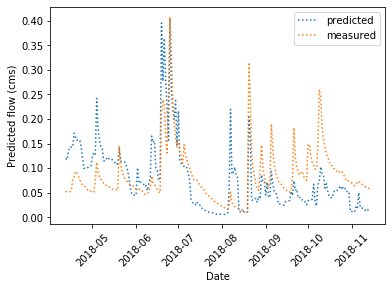

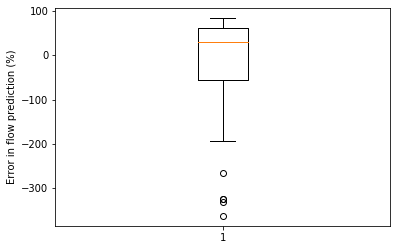

R2 value:  -0.02
Variables included: ['ppt', 'Day of year', '7-day ppt', '5-day ppt', '180-day ppt', '5-day temp']
Average error: -2.12
Median error: 31.0
Important feature added: 5-day temp


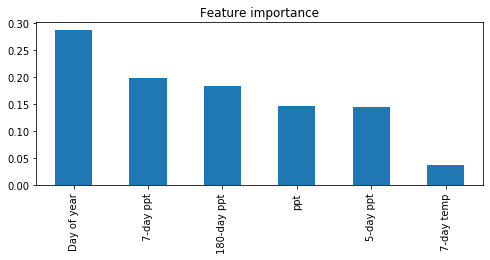

C:\Users\jiyeow\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


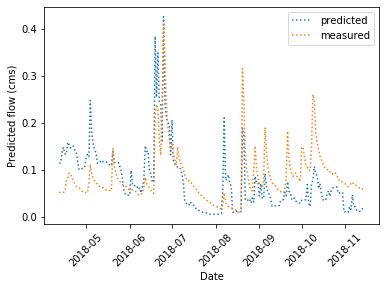

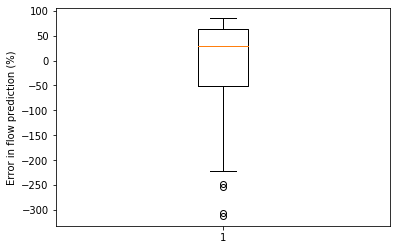

R2 value:  0.03
Variables included: ['ppt', 'Day of year', '7-day ppt', '5-day ppt', '180-day ppt', '7-day temp']
Average error: 1.27
Median error: 30.0


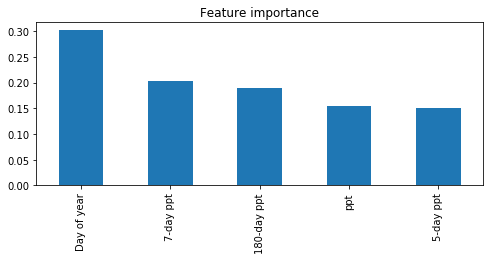

C:\Users\jiyeow\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


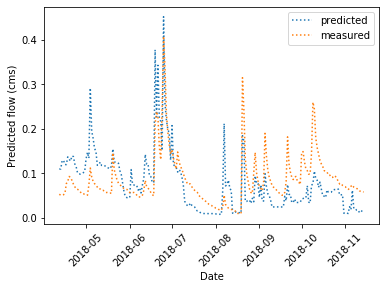

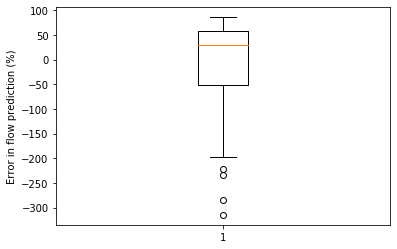

R2 value:  0.08
Variables included: ['ppt', 'Day of year', '7-day ppt', '5-day ppt', '180-day ppt']
Average error: -0.03
Median error: 29.0


In [61]:
# this cell of code does not improve model r2. Dont run it.

r2 = 0
r2_prev = 0
list_no = 0

while r2 < 0.7 and list_no < len(all_variables):
    least_important = fet_ind[-1]
    
    variables.remove(variables[least_important])
    
    X = df_merged[variables]
    X_train, X_test, Y_train, Y_test = train_test_split (X, y, test_size = 0.2, random_state = 0)

    rf_base = ske.RandomForestRegressor(n_estimators = 1000, random_state = 0)

    rf_base.fit(X_train, Y_train)

    Y_pred = rf_base.predict(X_test)

    #print('training period explained variance:', explained_variance_score(Y_test, Y_pred))
    #print('training period mean abs error:',mean_absolute_error(Y_test, Y_pred))
    #print('training period mean squared error:',mean_squared_error(Y_test, Y_pred))
    #print('training period r2:',r2_score(Y_test, Y_pred))
        
    fet_ind = np.argsort(rf_base.feature_importances_)[::-1]
    fet_imp = rf_base.feature_importances_[np.argsort(rf_base.feature_importances_)][::-1]
    
    fig, ax = plt.subplots(1, 1, figsize=(8,3))
    labels = np.asarray(X_train.columns[fet_ind])
    pd.Series(fet_imp, index = labels).plot('bar', ax=ax)
    ax.set_title('Feature importance')
    plt.show()

    df_weathersub = df_weather[df_weather["Year"].isin([2018])]
    df_weathersub = df_weathersub.reset_index(drop=True)
    df_test = df_weathersub
    df_test = df_test[variables]
    df_test = df_test.dropna()
    df_test = df_test.reset_index(drop=True)

    # If 'Date' variable is present, convert the date from timestamp to numeric because sklearn cannot process timestamp format
    if 'Date' in list(df_test):
        df_test['Date'] = pd.to_numeric(pd.to_datetime(df_test['Date']))

    # use base or random depending on model performance
    #Y_pred = rf_base.predict(df_test)
    Y_pred = rf_base.predict(df_test)

    df_predict = pd.DataFrame(Y_pred, columns=['flow_pred'])
    df_predict = pd.merge(df_test, df_predict, left_index=True, right_index=True)
    df_predict = pd.merge(df_weathersub['Date'], df_predict, left_index=True, right_index=True)
    df_predict = df_predict.rename(columns={'Date_x':'Date', 'Date_y':'Date num'})

    #df_predict['Date'] = pd.to_datetime(df_predict['Date'])

    # this is ISCO daily avg flow
    df_actual = df_flow[['Date', sub_flow]]
    df_actual['Year'] = pd.DatetimeIndex(df_actual['Date']).year
    df_actual = df_actual[df_actual["Year"].isin([2018])]
    df_actual = df_actual.dropna()

    df_predict = pd.merge(df_predict, df_actual, left_on='Date', right_on='Date', how='right')
    df_predict['error (%)'] = round(((df_predict[sub_flow]-df_predict['flow_pred'])/df_predict[sub_flow]*100), 0)

    plt.plot(df_predict['Date'], df_predict['flow_pred'], linestyle = 'dotted', label='predicted')
    plt.xlabel('Date')
    plt.xticks(rotation = 45)
    plt.plot(df_predict['Date'], df_predict[sub_flow], linestyle = 'dotted', label='measured')
    plt.ylabel('Predicted flow (cms)')
    plt.legend()
    plt.show()

    #print('prediction period explained variance:',explained_variance_score(df_predict[sub_flow], df_predict['flow_pred']))
    #print('prediction period mean abs error:',mean_absolute_error(df_predict[sub_flow], df_predict['flow_pred']))
    #print('prediction period mean squared error:',mean_squared_error(df_predict[sub_flow], df_predict['flow_pred']))
    #print('prediction period r2:',r2_score(df_predict[sub_flow], df_predict['flow_pred']))


    plt.boxplot(df_predict['error (%)'])
    plt.ylabel('Error in flow prediction (%)')
    plt.show()

    r2 = r2_score(df_predict[sub_flow], df_predict['flow_pred'])
     
    print('R2 value: ', round(r2, 2))
    print('Variables included:', variables)
    print('Average error:', round(df_predict['error (%)'].mean(),2))
    print('Median error:', round(df_predict['error (%)'].median(),2))
    
    # add the variable back into the model if model r2 decreases after the parameter is removed
    #print(fet_ind)
    #print(fet_imp)
    if r2 < r2_prev:
        important = fet_ind[-1]
        print('Important feature added:', variables[important])
        variables.append(all_variables[list_no]) 
    
    list_no = list_no + 1
    r2_prev = r2

### Using random grid model to improve base model

In [ ]:
# from sklearn.model_selection import RandomizedSearchCV
# the values below are somewhat selected arbitarily to cover a wide range of parameters

# Number of trees in random forest
#n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# Number of features to consider at every split
#max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
#max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
#max_depth.append(None)

# Minimum number of samples required to split a node
#min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
#min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
#bootstrap = [True, False]

# Create the random grid
#random_grid = {'n_estimators': n_estimators,
#               'max_features': max_features,
#               'max_depth': max_depth,
#               'min_samples_split': min_samples_split,
#               'min_samples_leaf': min_samples_leaf,
#               'bootstrap': bootstrap}

#pprint(random_grid)

In [ ]:
# Use the random grid to search for best hyperparameters
#rf = ske.RandomForestRegressor()

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
#rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=0, n_jobs = 1)
# Fit the random search model
#rf_random.fit(X_train, Y_train)

In [ ]:
#Y_pred = rf_random.predict(X_test)

#print('training period explained variance:', explained_variance_score(Y_test, Y_pred))
#print('training period mean abs error:',mean_absolute_error(Y_test, Y_pred))
#print('training period mean squared error:',mean_squared_error(Y_test, Y_pred))
#print('training period r2:',r2_score(Y_test, Y_pred))

In [ ]:
#def evaluate(model, X_train, Y_train):
#    predictions = model.predict(X_train)
#    errors = abs(predictions - Y_train)
#    mape = 100 * np.mean(errors / Y_train)
#    accuracy = 100 - mape
#    print('Model Performance')
#    print('Average Error: {:0.4f} cms.'.format(np.mean(errors)))
#    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
#    return accuracy

#class color:
#    BLUE = '\033[94m'
#    BOLD = '\033[1m'
#    END = '\033[0m'

#print(color.BOLD + color.BLUE + 'For Base Model' + color.END)
#base_accuracy = evaluate(rf_base, X_train, Y_train)

#print(color.BOLD + color.BLUE + 'For Random Model' + color.END)
#best_random = rf_random.best_estimator_
#random_accuracy = evaluate(best_random, X_train, Y_train)

#print(color.BOLD + color.BLUE + 'Base vs random model comparison' + color.END)
#print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

#pprint(rf_random.best_params_)

In [ ]:
#from sklearn.model_selection import GridSearchCV

# if the random model performed better than the base model, then use the best random grid to create range of each hyperparameter

# Number of trees in random forest
#n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# Number of features to consider at every split
#max_features = ['sqrt']

# Maximum number of levels in tree
#max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
#max_depth.append(None)

# Minimum number of samples required to split a node
#min_samples_split = [2, 3, 4]

# Minimum number of samples required at each leaf node
#min_samples_leaf = [1, 2, 3]

# Method of selecting samples for training each tree
#bootstrap = [False]

# Create the better grid
#better_grid = {'n_estimators': n_estimators,
#               'max_features': max_features,
#               'max_depth': max_depth,
#               'min_samples_split': min_samples_split,
#               'min_samples_leaf': min_samples_leaf,
#               'bootstrap': bootstrap}

# We used randamized search to identify the better grid (i.e., narrow down the range for each hyperparameter)
# Now we use the better grid to instantiate the grid search model
#grid_search = GridSearchCV(estimator = rf, param_grid = better_grid, 
#                          cv = 3, n_jobs = 1, verbose = 2)


In [ ]:
# Fit the grid search to the data
#grid_search.fit(X_train, Y_train)
#grid_search.best_params_

#best_grid = grid_search.best_estimator_
#grid_accuracy = evaluate(best_grid, X_train, Y_train)

#print('Improvement of {:0.2f}%.'.format( 100 * (grid_accuracy - base_accuracy) / base_accuracy))

In [ ]:
#Y_pred = rf_random.predict(X_test)

#print('training period explained variance:', explained_variance_score(Y_test, Y_pred))
#print('training period mean abs error:',mean_absolute_error(Y_test, Y_pred))
#print('training period mean squared error:',mean_squared_error(Y_test, Y_pred))
#print('training period r2:',r2_score(Y_test, Y_pred))

## Predict 2018 data, then compare against actual sample avg flow data

In [ ]:
#df_test = df_weather[df_weather["Year"].isin([2018])]
#df_test = df_test.reset_index(drop=True)
#df_test = pd.merge(df_weather, df_testraw, left_on='Date', right_on='Sample date', how='inner')

# convert Sample date from timestamp to numeric because sklearn cannot process timestamp format
#df_test['Date'] = pd.to_numeric(pd.to_datetime(df_test['Date']))
#df_test = df_test[variables]

# use base or random depending on model performance
#Y_pred = rf_base.predict(df_test)
#Y_pred = rf_random.predict(df_test)

#df_predict = pd.DataFrame(Y_pred, columns=['flow_pred'])
#df_predict = pd.merge(df_test, df_predict, left_index=True, right_index=True)

# this is flow-weighted sample avg flow
#df_actual = pd.read_excel('Test data 2018.xlsx', sheet_name = 'By subwatershed')
#df_actual = df_actual[(df_actual['Site'] == 'Sub8') & (df_actual['Sample type'] == 'Base')]
#df_actual = df_actual[['Sample date','Flow (cms)']]
#df_actual = df_actual.dropna()

#df_predict = pd.merge(df_actual, df_predict['flow_pred'], left_index=True, right_index=True)
#df_predict['error (%)'] = round(((df_predict['Flow (cms)']-df_predict['flow_pred'])/df_predict['Flow (cms)']*100), 0)

#df_predict['Sample date'] = pd.to_datetime(df_predict['Sample date'])

#print('prediction period explained variance:',explained_variance_score(df_predict['Flow (cms)'], df_predict['flow_pred']))
#print('prediction period mean abs error:',mean_absolute_error(df_predict['Flow (cms)'], df_predict['flow_pred']))
#print('prediction period mean squared error:',mean_squared_error(df_predict['Flow (cms)'], df_predict['flow_pred']))
#print('prediction period r2:',r2_score(df_predict['Flow (cms)'], df_predict['flow_pred']))

#plt.scatter(df_predict['Flow (cms)'], df_predict['flow_pred'])
#plt.xlabel('Actual flow (cms)')
#plt.ylabel('Predicted flow (cms)')

In [ ]:
#writer = pd.ExcelWriter('predict flow 2018.xlsx')
# write dataframe to excel
#df_predict.to_excel(writer)
# save the excel
#writer.save()